###**Project 	AdEase- Time Series**

About AdEase	Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad Ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them.

Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

Business Problem 	https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb

•	Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset.

•	Checking null values and understanding their reason.

•	Understanding the page name format and splitting it to get different information.

•	Separating different values from it like title, language, access type, and access origin.

•	Visualizing the data and getting inferences from them.

•	Converting the data to a format that can be fed to the ARIMA model (Pivoting etc)

•	Checking if the data is stationary, Dickey-Fuller test.

•	Trying different methods for stationarity.

•	Decomposition of series.

•	Differencing the series.

•	Plotting the ACF and PACF plots.

•	Give insights about the characteristics of the time series.

•	Modeling Creating and training the Arima model.

•	Getting the exogenous variable and using it to train a sarimax model.

•	Use facebook prophet for forecasting.

•	Finding a way (grid search / etc) to find the best params for at least
1 modeling approach.

•	Defining functions for all of the tasks.

•	Comparing results for all languages and creating inferences and recommendations from them.

•	The MAPE for previous batches has been in the range of 4-8%.

DATA DICTIONARY:
1.	**Train.csv-**
In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.
The page name contains data in this format: SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN having information about the page name, the main domain, the device type used to access the page, and also the request origin (spider or browser agent).

2.	**Exog_campaign_eng-**
This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.
There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English.

**Questionnaire:**

-Defining the problem statements and where can this and modifications of this be used?
-Write 3 inferences you made from the data visualizations
-What does the decomposition of series do?
-What level of differencing gave you a stationary series?
-Difference between **arima, sarima & sarimax**.
-Compare the number of views in different languages
-What other methods other than grid search would be suitable to get the model for all languages?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings("ignore")

##Import Data set & Description of Dataset

In [2]:
ad= pd.read_csv("/content/drive/MyDrive/Scaler/Study nCr/Projects/AdEase_Time series/Copy of train_1.csv")

In [3]:
ad.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
exo= pd.read_csv("/content/drive/MyDrive/Scaler/Study nCr/Projects/AdEase_Time series/Copy of Exog_Campaign_eng")
exo.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [5]:
# Creating the copy
exo_c=exo.copy()
ad_c=ad.copy()

In [6]:
print("Shape of ad data:", ad.shape)
print("Shape of exo data:", exo.shape)
# 145K pages and 550 days

Shape of ad data: (145063, 551)
Shape of exo data: (550, 1)


In [7]:
exo["Exog"].value_counts()

Exog
0    496
1     54
Name: count, dtype: int64

In [8]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [9]:
exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [10]:
ad[ad.duplicated()].shape
# No duplicacy

(0, 551)

##Null value analysis

In [11]:
ad.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [12]:
ad
# It seems, NaN of any page associated to dates symbolises the non-availability of that Page on that specific date.

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


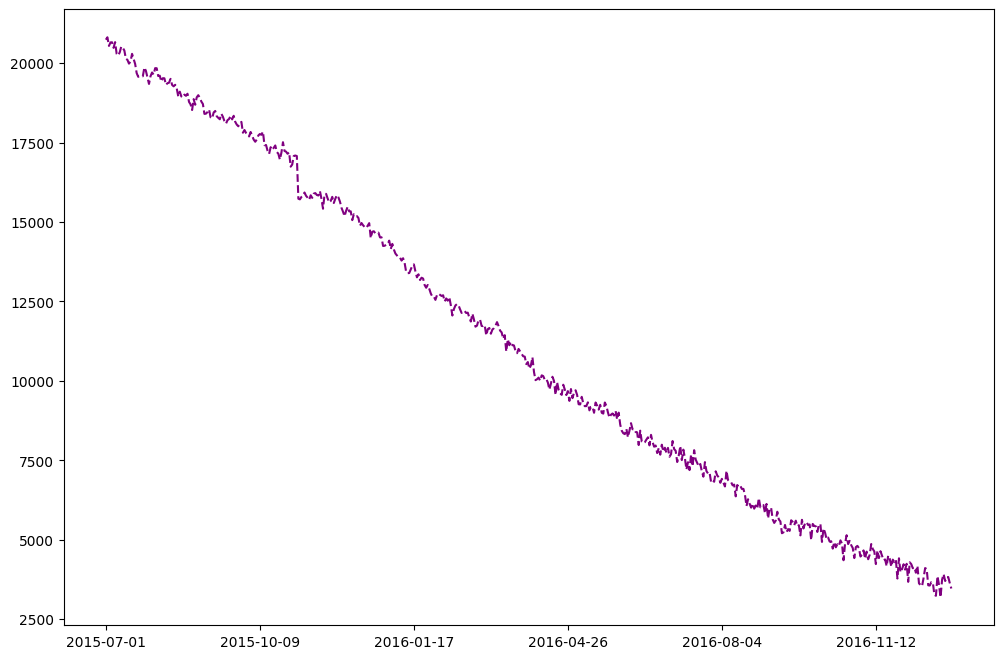

In [14]:
# Visuals of number of NAN values across the dataset
plt.figure(figsize=(12,8))
ad.iloc[:,1:].isna().sum().plot(color="Purple", linestyle="dashed")
plt.show()

**--->** **We shure about the NaN indication- The NaN is more in earlier/starting dates because of non-availability of the wikipedia pages.**

In [15]:
# We can observe some rows have 300 0.0 values wrt visit count. So we can remove rows with all NAN values/ with 300+ NAN values.
# thresh= Specifies the number of NOT NULL values required to keep the row.
ad.dropna(thresh=300, inplace=True)

In [16]:
ad.shape

(133617, 551)

In [17]:
ad.fillna(0, inplace=True)
ad.isna().sum()

Page          0
2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
             ..
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
2016-12-31    0
Length: 551, dtype: int64

## Feature Engineering & Extraction of Data

Lets discuss the name of page.
Here format of name is "SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN".

In [18]:
#Function to Extract Language from Page using Regex
import re
def get_language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_', name)) == 1 :
        return re.findall(r'_(.{2}).wikipedia.org_', name)[0]
    else: return 'Unknown_language'

ad['Language'] = ad['Page'].apply(get_language)

In [19]:
ad["Language"].value_counts()

Language
en                  22486
ja                  19295
de                  17362
fr                  16948
zh                  15211
Unknown_language    14494
ru                  14270
es                  13551
Name: count, dtype: int64

In [20]:
language_dict ={'en':'English',
                'ja': 'Japenese',
                'de':'German',
                'fr': 'French',
                'es': 'Spanish',
                'ru': 'Russian',
                'zh': 'Chinese',
                'Unknown_language': 'Unknown_language'}

ad['Language'] = ad['Language'].map(language_dict)

In [21]:
ad

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0,Spanish
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0,Spanish
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0,Spanish
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0,Spanish


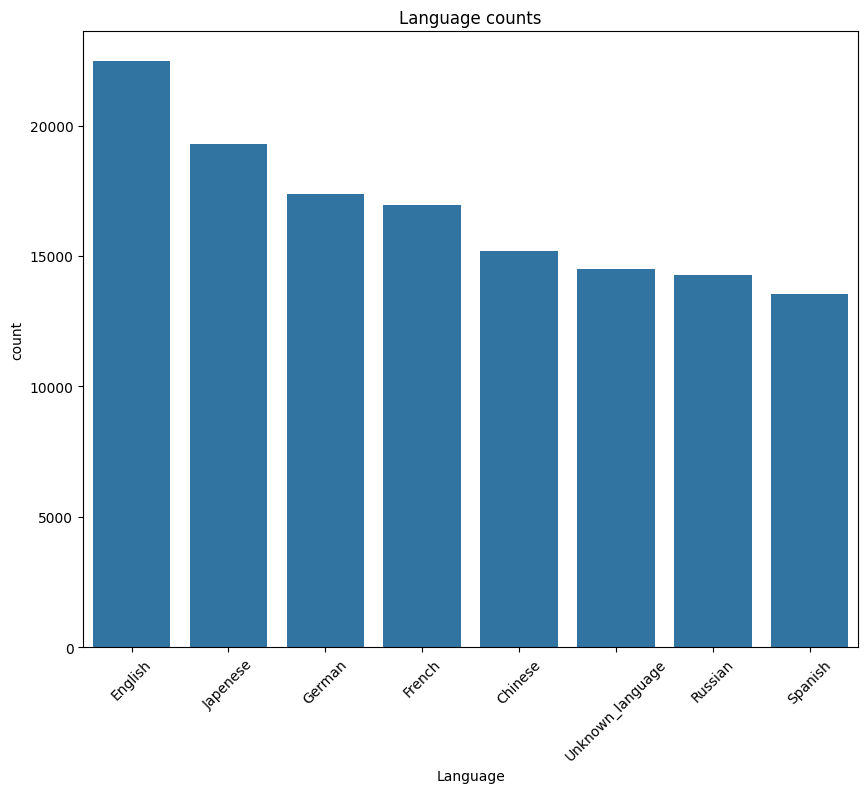

In [22]:
# Visualize the various language wikipedia pages
y = 'Language'
plt.figure(figsize=(10, 8))
sns.countplot(x=y , data=ad, order=ad[y].value_counts().index)
plt.title(f' {y} Distribution')
plt.xlabel(f'{y}',)
plt.ylabel('count')
plt.xticks(rotation= 45, fontsize= 10)
plt.title(f'{y} counts', fontsize = 12)
plt.show()

In [23]:
ad[ad["Language"]=="Unknown_language"].shape[0]/ad.shape[0]*100

10.84742210946212

**10.85% of pages have unkonwn Language.**

**English language is mostly used followed by Japanese and German.**

In [24]:
ad.loc[ad["Language"]=="Unknown_language"]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
13332,Accueil_commons.wikimedia.org_all-access_spider,55.0,48.0,44.0,35.0,46.0,41.0,32.0,43.0,40.0,...,74.0,34.0,62.0,88.0,57.0,74.0,61.0,51.0,60.0,Unknown_language
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,5.0,3.0,4.0,6.0,3.0,1.0,5.0,6.0,6.0,...,43.0,44.0,38.0,31.0,29.0,37.0,32.0,29.0,34.0,Unknown_language
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,4.0,6.0,9.0,7.0,6.0,4.0,5.0,6.0,13.0,...,44.0,47.0,46.0,35.0,31.0,31.0,34.0,28.0,27.0,Unknown_language
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,5.0,2.0,6.0,6.0,8.0,11.0,5.0,5.0,6.0,...,18.0,13.0,11.0,8.0,8.0,13.0,5.0,11.0,6.0,Unknown_language
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,8.0,6.0,15.0,5.0,5.0,9.0,10.0,3.0,9.0,...,32.0,40.0,38.0,29.0,19.0,30.0,29.0,26.0,26.0,Unknown_language
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84730,help:contents_www.mediawiki.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,15.0,7.0,18.0,17.0,15.0,3.0,11.0,Unknown_language
84731,how_to_contribute_www.mediawiki.org_all-access...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,4.0,18.0,2.0,172.0,19.0,29.0,2.0,178.0,Unknown_language
84732,mediawiki_www.mediawiki.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,13.0,24.0,11.0,12.0,51.0,23.0,3.0,48.0,Unknown_language
84733,special:book_www.mediawiki.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,3.0,53.0,300.0,3.0,44.0,6.0,0.0,154.0,Unknown_language


In [25]:
#Function to Extract Access Type from Page using Regex
def get_access_type(name):
    if len(re.findall(r'all-access|mobile-web|desktop', name)) == 1 :
        return re.findall(r'all-access|mobile-web|desktop', name)[0]
    else: return 'No_access_type'

ad['Access_type'] = ad['Page'].apply(get_access_type)

In [26]:
ad["Access_type"].value_counts()
# All access types are present in the dataset

Access_type
all-access    68718
mobile-web    33299
desktop       31600
Name: count, dtype: int64

In [27]:
ad

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language,Access_type
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese,all-access
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese,all-access
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese,all-access
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese,all-access
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,Chinese,all-access
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0,Spanish,all-access
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0,Spanish,all-access
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0,Spanish,all-access
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0,Spanish,all-access


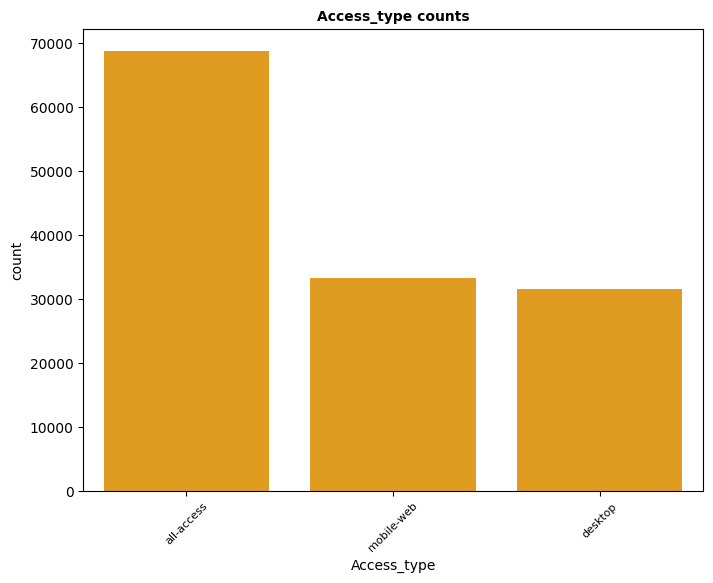

In [28]:
# Visualize the various accessing devices to wikipedia pages
y = 'Access_type'
plt.figure(figsize=(8, 6))
sns.countplot(x=y , data=ad, color="orange", order=ad[y].value_counts().index)
plt.title(f' {y} Distribution')
plt.xlabel(f'{y}',)
plt.ylabel('count')
plt.xticks(rotation= 45, fontsize= 8)
plt.title(f'{y} counts', fontsize = 10, fontweight = 'bold')
plt.show()

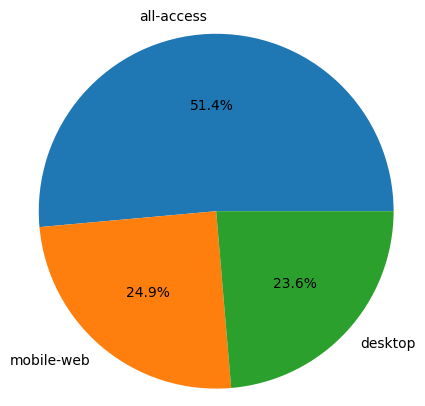

In [29]:
# For Share analysis
x = ad["Access_type"].value_counts().values
y = ad["Access_type"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%')
plt.show()

In [30]:
#Function to Extract Access origin from Page using Regex
def get_access_origin(name):
    if len(re.findall(r'[ai].org_(.*)_(.*)$', name)) == 1 :
        return re.findall(r'[ai].org_(.*)_(.*)$', name)[0][1]
    else: return 'No_access_origin'

ad['Access_origin'] = ad['Page'].apply(get_access_origin)
ad["Access_origin"].value_counts()
# All access origins are present in the dataset

Access_origin
all-agents    101303
spider         32314
Name: count, dtype: int64

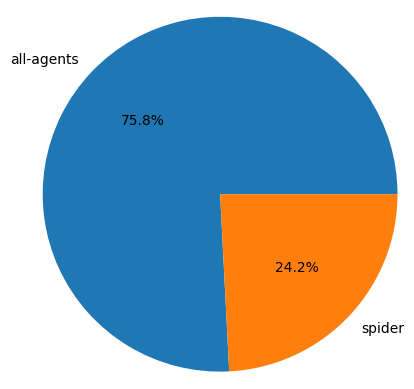

In [31]:
# Visualize the various access origin to wikipedia pages
x = ad["Access_origin"].value_counts().values
y = ad["Access_origin"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%')
plt.show()

In [32]:
ad

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,Chinese,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,4.0,4.0,1.0,2.0,2.0,Spanish,all-access,spider
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,3.0,3.0,10.0,11.0,3.0,Spanish,all-access,spider
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182.0,43.0,8.0,22.0,13.0,18.0,14.0,Spanish,all-access,spider
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,8.0,7.0,5.0,43.0,12.0,25.0,Spanish,all-access,spider


## Conversion of Data format for ARIMA/SARIMA implementation.

In [33]:
# Language Dataframe
ad_language= ad.groupby("Language").mean(numeric_only= True).transpose()
ad_language.drop(['Unknown_language'], inplace = True, axis = 1)
ad_language.reset_index(inplace = True)
ad_language.set_index('index', inplace = True)
ad_language

Language,Chinese,English,French,German,Japenese,Russian,Spanish
index,,,,,,,
2015-07-01,272.498521,3767.328604,499.092872,763.765926,614.637160,663.199229,1127.485204
2015-07-02,272.906778,3755.158765,502.297852,753.362861,705.813216,674.677015,1077.485425
2015-07-03,271.097167,3565.225696,483.007553,723.074415,637.451671,625.329783,990.895949
2015-07-04,273.712379,3711.782932,516.275785,663.537323,800.897435,588.171829,930.303151
2015-07-05,291.977713,3833.433025,506.871666,771.358657,768.352319,626.385354,1011.759575
...,...,...,...,...,...,...,...
2016-12-27,363.066991,6314.335275,840.590217,1119.596936,808.541436,998.374071,1070.923400
2016-12-28,369.049701,6108.874144,783.585379,1062.284069,807.430163,945.054730,1108.996753
2016-12-29,340.526330,6518.058525,763.209169,1033.939062,883.752786,909.352207,1058.660320


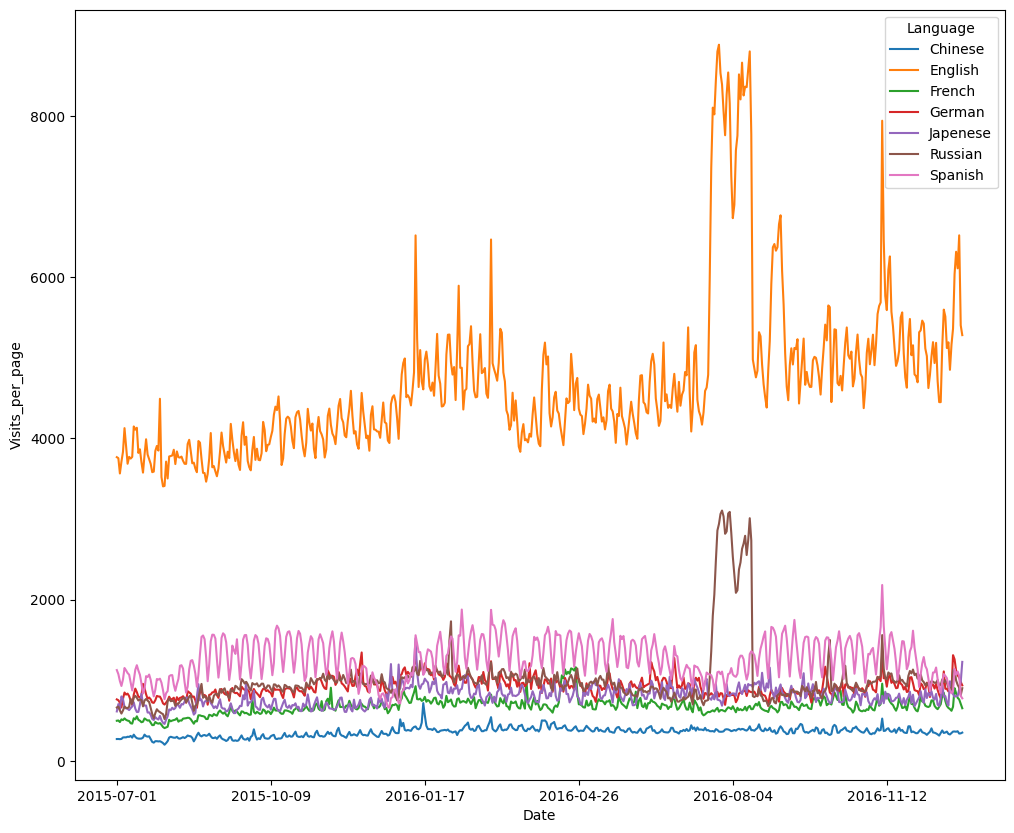

In [34]:
# Check the fassion of the visit on various language.
ad_language.plot(label = ad_language.columns,  figsize=(12, 10))
plt.xlabel("Date")
plt.ylabel("Visits_per_page")
plt.show()

1. As we observe that the English language is much more popular language than others.

2. English language has larger variations in visit count wrt time.

3. Russian Language was become popular in later July and early August in 2016.

4. Chinese, French, Japanese, German languages are more stable wrt visit over time.

5. Let's check with the Dickey-Fuller Test.

##**DICKEY-FULLER TEST**

In [35]:
import statsmodels.api as sm
# H0- sequence is non stationary
# Ha- sequence is stationary
def adf_test(dataset):
   p_value = sm.tsa.stattools.adfuller(dataset)[1]
   print(p_value)
   if p_value <= 0.05:
      print('Reject null hypothesis\n'+'\033[1m'+'Sequence is stationary'+'\033[0;0m')
   else:
      print('Fail to reject the null hypothesis\n'+'\033[1m'+'Sequence is not-stationary'+'\033[0;0m')

In [36]:
adf_test(ad_language["English"])

0.14933749437355304
Fail to reject the null hypothesis
Sequence is not-stationary


In [37]:
adf_test(ad_language["Chinese"])

0.3219384419565085
Fail to reject the null hypothesis
Sequence is not-stationary


In [38]:
adf_test(ad_language["French"])

0.042960202017128
Reject null hypothesis
Sequence is stationary


In [39]:
adf_test(ad_language["German"])

0.14005032008360363
Fail to reject the null hypothesis
Sequence is not-stationary


In [40]:
adf_test(ad_language["Russian"])

0.0017632662037633325
Reject null hypothesis
Sequence is stationary


In [41]:
adf_test(ad_language["Spanish"])

0.04215053463615071
Reject null hypothesis
Sequence is stationary


In [42]:
adf_test(ad_language["Japenese"])

0.07231258891845853
Fail to reject the null hypothesis
Sequence is not-stationary


1. **Stationary Time Series**:
Russian, Spanish and French
2. **Non-Stationary Time Series**:
English, Japenese, Chinese, German

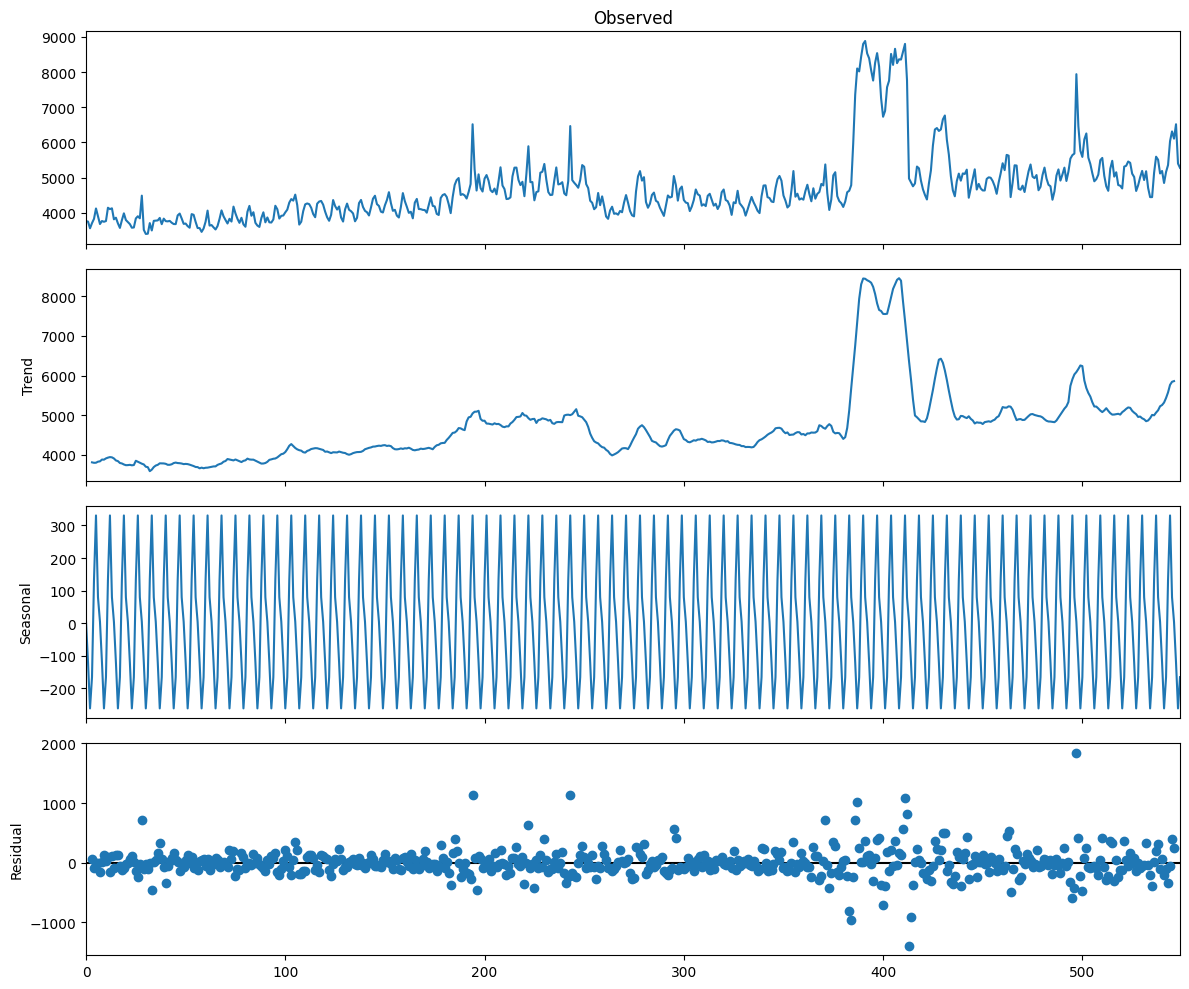

In [44]:
''' For application of better prediction models- ARIMA, SARIMA, SARIMAX let's convert the
Non-stationary TS to Stationary TS.'''
#actual value= trend + seasonality + residuals
# For English Language- Residual findings
ad_language_eng= ad_language.English.values

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ad_language_eng, model='additive', period=7)

fig = decomposition.plot()
fig.set_size_inches((12, 10))
fig.tight_layout()
plt.show()

In [45]:
ad_language_eng_residual = pd.DataFrame(decomposition.resid).fillna(0)[0].values
adf_test(ad_language_eng_residual)

4.020092431859908e-21
Reject null hypothesis
Sequence is stationary


**Now residual is converted into the Stationary Time series.**

In [46]:
# Similarly for Japenese, Chinese and German respectively
ad_language_Jap= ad_language.Japenese.values
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition2 = seasonal_decompose(ad_language_Jap, model='additive', period=7)
ad_language_Jap_residual = pd.DataFrame(decomposition2.resid).fillna(0)[0].values
adf_test(ad_language_Jap_residual)

ad_language_Ch= ad_language.Chinese.values
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition3 = seasonal_decompose(ad_language_Ch, model='additive', period=7)
ad_language_Ch_residual = pd.DataFrame(decomposition3.resid).fillna(0)[0].values
adf_test(ad_language_Ch_residual)

ad_language_Ger= ad_language.German.values
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition4 = seasonal_decompose(ad_language_Ger, model='additive', period=7)
ad_language_Ger_residual = pd.DataFrame(decomposition4.resid).fillna(0)[0].values
adf_test(ad_language_Ger_residual)

3.2094174808249383e-16
Reject null hypothesis
Sequence is stationary
1.8850191170536124e-18
Reject null hypothesis
Sequence is stationary
4.255148785092927e-18
Reject null hypothesis
Sequence is stationary


**Imp: Parallely we can get the stationary dataset by using the .diff() function_ BY using the d=1**

In [47]:
ad_diff_eng= pd.DataFrame(ad_language_eng).diff(1)
ad_diff_eng.dropna(inplace=True)
adf_test(ad_diff_eng)

4.721271966433558e-13
Reject null hypothesis
Sequence is stationary


In [48]:
ad_diff_jap= pd.DataFrame(ad_language_Jap).diff(1)
ad_diff_jap.dropna(inplace=True)
adf_test(ad_diff_jap)

0.0
Reject null hypothesis
Sequence is stationary


In [49]:
ad_diff_Ch= pd.DataFrame(ad_language_Ch).diff(1)
ad_diff_Ch.dropna(inplace=True)
adf_test(ad_diff_Ch)

2.9029073148322454e-11
Reject null hypothesis
Sequence is stationary


In [50]:
ad_diff_Ger= pd.DataFrame(ad_language_Ger).diff(1)
ad_diff_Ger.dropna(inplace=True)
adf_test(ad_diff_Ger)

2.8799341086031565e-10
Reject null hypothesis
Sequence is stationary


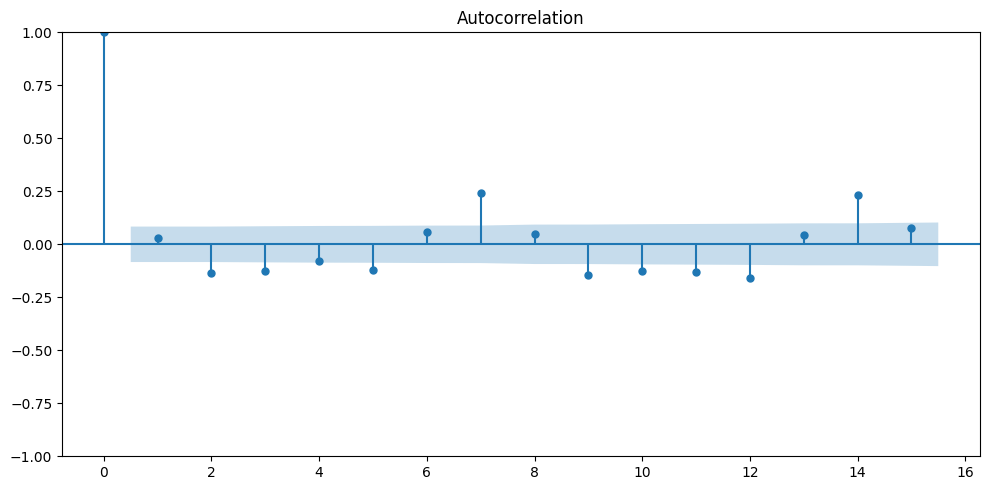

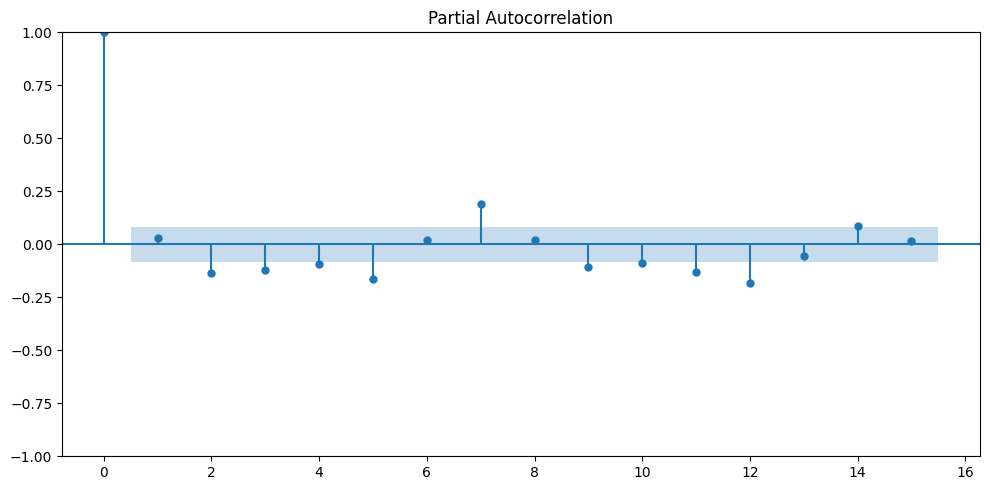

In [51]:
# Value of d is 1.
# ACF and PACF- For value of m
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(ad_diff_eng, lags= 15)
acf.set_size_inches((10, 5))
acf.tight_layout()
pacf = plot_pacf(ad_diff_eng, lags= 15)
pacf.set_size_inches((10, 5))
pacf.tight_layout();
# We can check that the value of m/seassonality is "7" here.

## Forecasting Model

<Figure size 2500x1000 with 0 Axes>

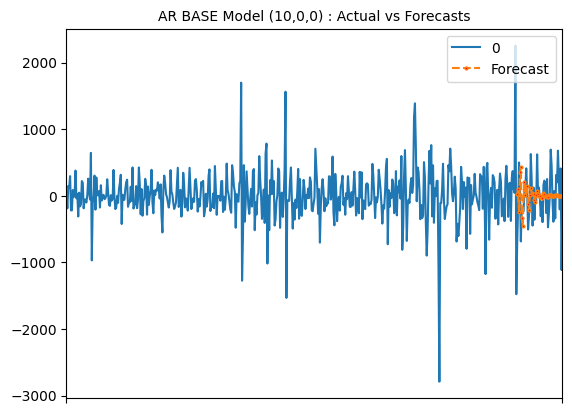

--------------------------------------------------------------------------------
MAPE of Model : 12.36
--------------------------------------------------------------------------------
RMSE of Model : 386.568
--------------------------------------------------------------------------------
MAE of Model : 306.386
--------------------------------------------------------------------------------


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings # supress warnings
warnings.filterwarnings('ignore')

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
  A = actual.values[-n:]
  E = actual.values[-n:] - predicted.values

  mape = np.mean(np.abs(E)/ np.abs(A))
  rmse = np.sqrt(np.mean(E**2))
  mae = np.mean(np.abs(E))

  print('-'*80)
  print(f'MAPE of Model : {np.round(mape,3)}')
  print('-'*80)
  print(f'RMSE of Model : {np.round(rmse,3)}')
  print('-'*80)
  print(f'MAE of Model : {np.round(mae,3)}')
  print('-'*80)

# order = (p, d, q)
# AR(10)
n=50 # forecast for last 50 values
TS_english= ad_diff_eng.copy() # stationary time series input
TS_english = pd.DataFrame(TS_english)
model = SARIMAX(TS_english[:-n], order = (10, 0, 0))
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, aplha= 0.05)

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english.plot(label = 'Actual')
TS_english_forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
plt.legend(loc="upper right")
plt.title('AR BASE Model (10,0,0) : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

<Figure size 2500x1000 with 0 Axes>

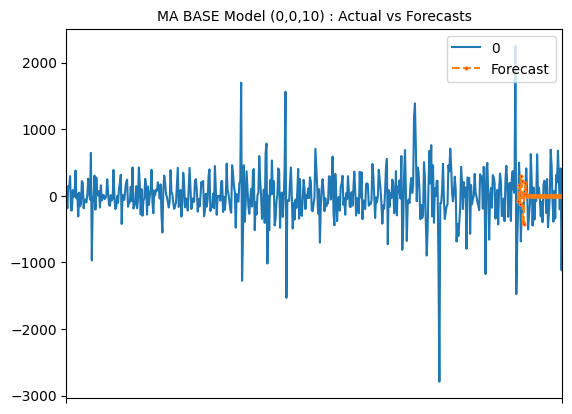

--------------------------------------------------------------------------------
MAPE of Model : 7.24
--------------------------------------------------------------------------------
RMSE of Model : 377.985
--------------------------------------------------------------------------------
MAE of Model : 299.995
--------------------------------------------------------------------------------


In [53]:
# order = (p, d, q)
# MA(10)
n=50 # forecast for last 50 values
model = SARIMAX(TS_english[:-n], order = (0, 0, 10))
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, aplha= 0.05)

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english.plot(label = 'Actual')
TS_english_forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
plt.legend(loc="upper right")
plt.title('MA BASE Model (0,0,10) : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

<Figure size 2500x1000 with 0 Axes>

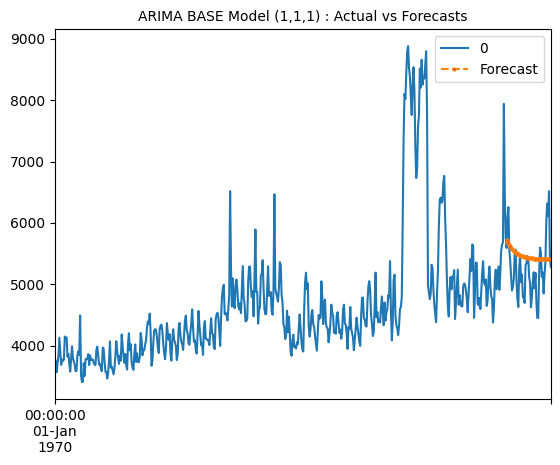

--------------------------------------------------------------------------------
MAPE of Model : 0.084
--------------------------------------------------------------------------------
RMSE of Model : 524.214
--------------------------------------------------------------------------------
MAE of Model : 430.599
--------------------------------------------------------------------------------


In [58]:
# order = (p, d, q)
# ARIMA(1,1,1) by using SARIMAX model
n=50 # forecast for last 50 values
TS_english= ad_language_eng.copy() # Non-stationary time series
TS_english = pd.DataFrame(TS_english)
model = SARIMAX(TS_english[:-n], order = (1, 1, 1))
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, aplha= 0.05)

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english.plot(label = 'Actual')
TS_english_forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

<Figure size 2500x1000 with 0 Axes>

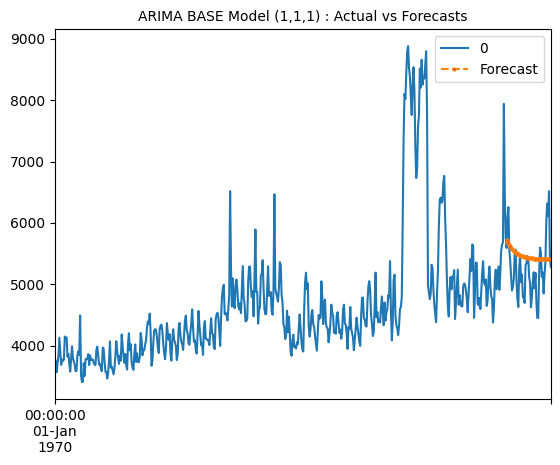

--------------------------------------------------------------------------------
MAPE of Model : 0.084
--------------------------------------------------------------------------------
RMSE of Model : 524.214
--------------------------------------------------------------------------------
MAE of Model : 430.599
--------------------------------------------------------------------------------


In [60]:
# order = (p, d, q)
# ARIMA(1,1,1) by using ARIMA model
from statsmodels.tsa.arima.model import ARIMA
n=50 # forecast for last 50 values
TS_english= ad_language_eng.copy() # Non-stationary time series
TS_english = pd.DataFrame(TS_english)
model = ARIMA(TS_english[:-n], order = (1, 1, 1))
model = model.fit()
TS_english_forecast = model.forecast(steps=n, aplha= 0.05)

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english.plot(label = 'Actual')
TS_english_forecast.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

MAPE value is about 8.4% for ARIMA model.

<Figure size 2500x1000 with 0 Axes>

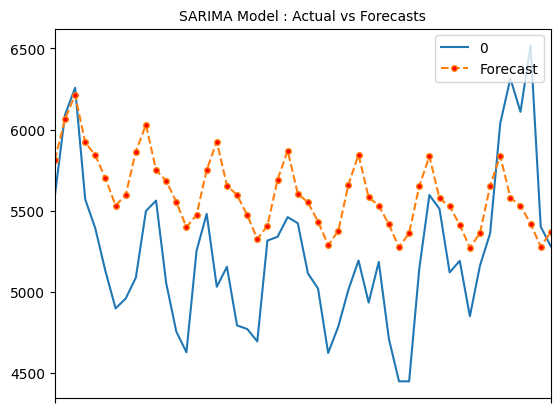

--------------------------------------------------------------------------------
MAPE of Model : 0.104
--------------------------------------------------------------------------------
RMSE of Model : 630.801
--------------------------------------------------------------------------------
MAE of Model : 530.103
--------------------------------------------------------------------------------


In [71]:
# order = (p, d, q) and seasonal order(1,1,1,7)
# SARIMA(1,1,1)
n=50 # forecast for last 50 values
model = SARIMAX(TS_english[:-n], order = (1, 1, 1), seasonal_order=(1, 0, 1, 7))
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, dynamic=True)

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english[-n:].plot(label = 'Actual')
TS_english_forecast[-n:].plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=4)
plt.legend(loc="upper right")
plt.title('SARIMA Model : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

<Figure size 2500x1000 with 0 Axes>

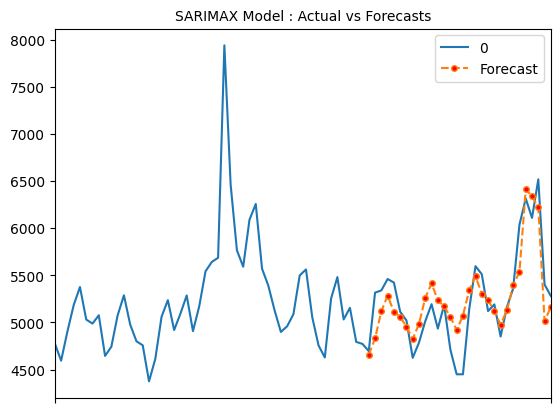

--------------------------------------------------------------------------------
MAPE of Model : 0.091
--------------------------------------------------------------------------------
RMSE of Model : 640.197
--------------------------------------------------------------------------------
MAE of Model : 479.09
--------------------------------------------------------------------------------


In [86]:
# order = (p, d, q) and seasonal order(1,0,1,7)
# SARIMAX(1,1,1) with exog
n=30 # forecast for last 50 values
exo_aligned = exo.set_index(TS_english.index)
model = SARIMAX(TS_english[:-n], order = (1, 1, 1), seasonal_order=(1, 0, 1, 7), exog= exo_aligned[:-n])
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, dynamic=True, exog = pd.DataFrame(exo_aligned[-n:]))

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english[-80:].plot(label = 'Actual')
TS_english_forecast[-80:].plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=4)
plt.legend(loc="upper right")
plt.title('SARIMAX Model : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

Alternatively we can perform SARIMAX in much more elaborated form

In [84]:
# order = (p, d, q) and seasonal order(1,1,1,7)
# SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog = []):

    #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s)
    model = SARIMAX(time_series[:-n], \
                    order =(p,d,q),
                    seasonal_order=(P, D, Q, s),
                    exog = exog[:-n],
                    initialization='approximate_diffuse')
    model_fit = model.fit()

    #Creating forecast for last n-values
    model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

    #plotting Actual & Forecasted values
    time_series.index = time_series.index.astype('datetime64[ns]')
    model_forecast.index = model_forecast.index.astype('datetime64[ns]')
    plt.figure(figsize = (20,8))
    time_series[-60:].plot(label = 'Actual')
    model_forecast[-60:].plot(label = 'Forecast', color = 'red',
                              linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
    plt.legend(loc="upper right")
    plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
    plt.show()

    #Calculating MAPE & RMSE
    actuals = time_series.values[-n:]
    errors = time_series.values[-n:] - model_forecast.values

    mape = np.mean(np.abs(errors)/ np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))

    print('-'*80)
    print(f'MAPE of Model : {np.round(mape,5)}')
    print('-'*80)
    print(f'RMSE of Model : {np.round(rmse,3)}')
    print('-'*80)

<Figure size 2000x800 with 0 Axes>

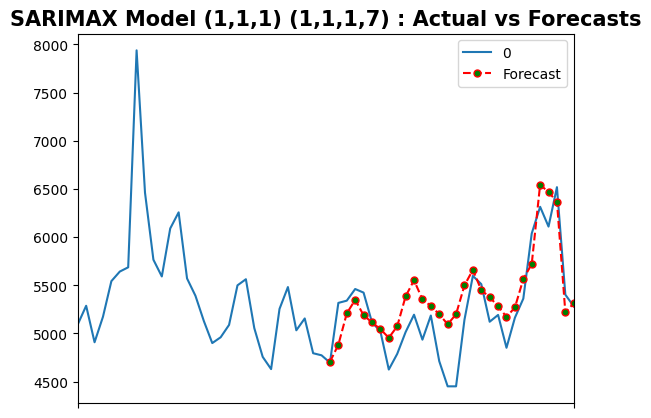

--------------------------------------------------------------------------------
MAPE of Model : 0.09591
--------------------------------------------------------------------------------
RMSE of Model : 662.775
--------------------------------------------------------------------------------


In [85]:
#Checking a SARIMAX model with seasonality (p,d,q,P,D,Q,s = 1,1,1,1,1,1,7)
exog = exo['Exog'].to_numpy()
time_series= ad_language_eng
test_size= 0.1
p,d,q, P,D,Q,s = 1,1,1,1,1,1,7
n = 30
sarimax_model(TS_english, n, p=p, d=d, q=q, P=P, D=D, Q=Q, s=s, exog = exog)

<Figure size 2500x1000 with 0 Axes>

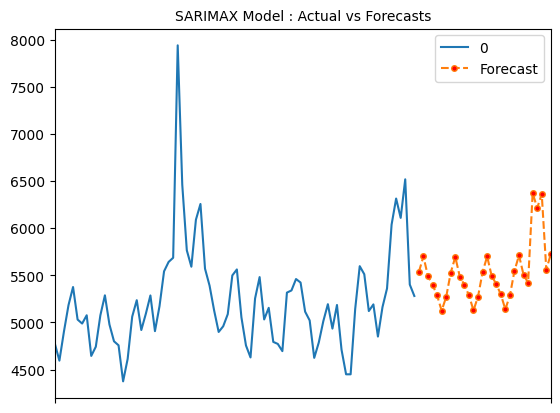

--------------------------------------------------------------------------------
MAPE of Model : 0.101
--------------------------------------------------------------------------------
RMSE of Model : 650.844
--------------------------------------------------------------------------------
MAE of Model : 518.116
--------------------------------------------------------------------------------


In [88]:
# order = (p, d, q) and seasonal order(1,0,1,7)
# SARIMAX(1,1,1) with exog
n=30 # forecast for last 50 values
exo_aligned = exo.set_index(TS_english.index)
model = SARIMAX(TS_english[n:], order = (1, 1, 1), seasonal_order=(1, 0, 1, 7), exog= exo_aligned[n:])
model = model.fit(disp = False)
TS_english_forecast = model.forecast(steps=n, dynamic=True, exog = pd.DataFrame(exo_aligned[-n:]))

#plotting Actual & Forecasted values
TS_english.index = TS_english.index.astype('datetime64[ns]')
TS_english_forecast.index = TS_english_forecast.index.astype('datetime64[ns]')
plt.figure(figsize = (25,10))
TS_english[-80:].plot(label = 'Actual')
TS_english_forecast[-80:].plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='red', markersize=4)
plt.legend(loc="upper right")
plt.title('SARIMAX Model : Actual vs Forecasts', fontsize = 10)
plt.show()

performance(TS_english, TS_english_forecast)

MAPE value is about 9.1% for SARIMAX model.

## Best Parameters  For English and other Languages

In [89]:
def sarimax_grid_search(time_series, n, param, d_param, s_param, exog = []):
    counter = 0
    #creating df for storing results summary
    param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])

    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n],
                                                order=(p,d,q),
                                                seasonal_order=(P, D, Q, s),
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()

                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))

                                #Calculating errors for results
                                A = time_series.values[-n:]
                                E = time_series.values[-n:] - model_forecast.values

                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(E)/ np.abs(A))
                                rmse = np.sqrt(np.mean(E**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)

                                #Storing the results in param_df
                                counter += 1
                                list_row = [counter, (p,d,q), (P,D,Q,s), mape, rmse]
                                param_df.loc[len(param_df)] = list_row

                #print statement to check progress of Loop
                print(f'Possible Combination: {counter} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

    return param_df

In [91]:
#long time to execute
#Finding best parameters for English time series
exog = exo['Exog'].to_numpy()
time_series = pd.DataFrame(ad_language_eng)
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]

english_params  = sarimax_grid_search(time_series, n, param, d_param,s_param, exog)

Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated


In [92]:
english_params.sort_values(['mape', 'rmse']).head()

,serial,pdq,PDQs,mape,rmse
259,260,"(2, 0, 2)","(1, 0, 1, 7)",0.08150,590.422
199,200,"(1, 1, 2)","(0, 0, 1, 7)",0.08417,607.502
289,290,"(2, 1, 1)","(0, 0, 1, 7)",0.08420,607.705
290,291,"(2, 1, 1)","(0, 0, 2, 7)",0.08462,610.001
308,309,"(2, 1, 2)","(0, 0, 2, 7)",0.08474,610.197


In [96]:
#Function to fetch best parameters for each language

def pipeline_sarimax_grid_search_without_exog(languages, data_language, n, param, d_param, s_param):

    best_param_df  = pd.DataFrame(columns = ['language','p','d', 'q', 'P','D','Q','s','mape'])
    for lang in languages:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        counter = 0
        time_series = data_language[lang]
        #creating df for storing results summary
        #param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
        best_mape = 100

        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(time_series[:-n],
                                                    order=(p,d,q),
                                                    seasonal_order=(P, D, Q, s),
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = time_series.values[-n:]
                                    errors = time_series.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))

                                    counter += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop
                    print(f'Possible Combination: {counter} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')

        best_mape = np.round(best_mape, 5)
        print(f'--------------------------------------------------------------')
        print(f'Minimum MAPE for {lang} = {best_mape}')
        print(f'Corresponding Best Parameters are {best_p , best_d, best_q, best_P, best_D, best_Q, best_s}')
        print(f'--------------------------------------------------------------')

        best_param_row = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        best_param_df.loc[len(best_param_df)] = best_param_row

    return best_param_df

In [ ]:
#long time to execute
#calculating best parameters for all languages
languages = ['Chinese', 'French', 'German', 'Japenese', 'Russian', 'Spanish']
n = 30
param = [0,1,2]
d_param = [0,1]
s_param = [7]


best_param_df = pipeline_sarimax_grid_search_without_exog(languages, ad_language, n, param, d_param, s_param)

In [ ]:
best_param_df.sort_values(['mape'], inplace = True)
best_param_df

##Business Conclusions
1. As we observe that the English language is much more popular language than others so advertisement should be done on English Wikipedia pages.

2. Spanish is next most used Pages.

3. Russian & German languages are more stable wrt visit over time with limited number of visits.

4. WRT visits:
English > Spanish > Russian > German > Japenese > French > Chinese

5. There are 3 Access types :

  All-access(51.4%), mobile-web (24.9%) and desktop(23.6%)

6. There are 2 Access-origins:
  
  all-agents (75.8%) and spider (24.2%).